<a href="https://colab.research.google.com/github/AshnaVirdikar/Internship_files/blob/main/BoW_Log_Reg_Final_AshnaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASHNA'S CODE USING BAG OF WORDS MODEL FOR NLP

#Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re 
import wordcloud
import matplotlib
from textblob import TextBlob


# Importing the dataset

In [2]:
data= pd.read_csv('Tweet_global_warming.csv')

In [3]:
# to ignore jupytr notebook mein warnings!
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis - intuition abt dataset 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       6090 non-null   object 
 1   existence   4225 non-null   object 
 2   confidence  6087 non-null   float64
dtypes: float64(1), object(2)
memory usage: 142.9+ KB


In [5]:
data['existence'].value_counts()

Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64

In [6]:
data['confidence'].min()

0.3346

In [7]:
data['confidence'].max()

1.0

In [8]:
#to check the total number of rows that have duplicate values
data.duplicated().sum() 

127

In [9]:
# dropping duplicate values 
data=data.drop_duplicates (keep = 'first',inplace=False)


In [10]:
#Checking for missing values 
data.isnull().sum()

tweet            0
existence     1829
confidence       3
dtype: int64

In [11]:
#dropping missing values 
data=data.dropna(axis=0,how='any') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4134 entries, 0 to 6089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       4134 non-null   object 
 1   existence   4134 non-null   object 
 2   confidence  4134 non-null   float64
dtypes: float64(1), object(2)
memory usage: 129.2+ KB


In [12]:
#getting value counts for df
data['existence'].value_counts()

Y      2519
N      1047
Yes     510
No       58
Name: existence, dtype: int64

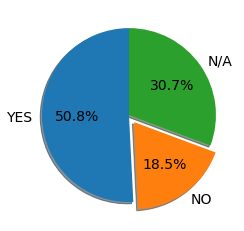

In [13]:
# Visualizing the values of the 3 classes before nlp model
import matplotlib.pyplot as plt
existence= ['YES','NO','N/A'] 
values = [3029,1105,1829] 
import matplotlib.pyplot as plt
 

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(values, explode=explode, labels=existence,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
 
plt.show()

#Part 1: Preprocessing data
# Cleaning the texts for sentiment analysis

In [14]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
data['clean_tweet'] = data['tweet']


In [16]:
# Changing all the tweets into lowercase 
data['clean_tweet'] =data['clean_tweet'].apply(lambda x: x.lower())
data.head()

,tweet,existence,confidence,clean_tweet
0,Global warming report urges governments to act...,Yes,1.0000,global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,fighting poverty and global warming in africa ...
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,carbon offsets: how a vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,carbon offsets: how a vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,uruguay: tools needed for those most vulnerabl...


In [18]:
# Removing "@user" from all the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "@[\w]*")
data.head(10)

,tweet,existence,confidence,clean_tweet
0,Global warming report urges governments to act...,Yes,1.0000,global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,fighting poverty and global warming in africa ...
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,carbon offsets: how a vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,carbon offsets: how a vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,uruguay: tools needed for those most vulnerabl...
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000,rt : rt : ocean saltiness shows global warming...
6,Global warming evidence all around us|A messag...,Yes,1.0000,global warming evidence all around us|a messag...
7,Migratory Birds' New Climate Change Strategy: ...,Yes,1.0000,migratory birds' new climate change strategy: ...
8,Southern Africa: Competing for Limpopo Water: ...,Yes,1.0000,southern africa: competing for limpopo water: ...
9,"Global warming to impact wheat, rice productio...",Yes,1.0000,"global warming to impact wheat, rice productio..."


In [19]:
#Removing links 

data['clean_tweet'] =data['clean_tweet'].apply(lambda x : re.sub(r'[https?:\/\/]',' ',x))
data.head(10)

,tweet,existence,confidence,clean_tweet
0,Global warming report urges governments to act...,Yes,1.0000,global warming re or urge governmen o ac ...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,fig ing over y and global warming in africa ...
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,carbon off e ow a va ican fore failed o...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,carbon off e ow a va ican fore failed o...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,uruguay ool needed for o e mo vulnerabl...
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000,r r ocean al ine ow global warming...
6,Global warming evidence all around us|A messag...,Yes,1.0000,global warming evidence all around u |a me ag...
7,Migratory Birds' New Climate Change Strategy: ...,Yes,1.0000,migra ory bird ' new clima e c ange ra egy ...
8,Southern Africa: Competing for Limpopo Water: ...,Yes,1.0000,ou ern africa com e ing for lim o o wa er ...
9,"Global warming to impact wheat, rice productio...",Yes,1.0000,"global warming o im ac w ea , rice roduc io..."


In [20]:
#Replacing Special Characters with space
data['clean_tweet'] =data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
#Replacing Punctuations with space
data['clean_tweet'] =data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
pd.options.display.max_colwidth=200
data.head(10)

,tweet,existence,confidence,clean_tweet
0,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]",Yes,1.0000,global warming re or urge governmen o ac bru el belgium a e world face increa ed unger and link
1,Fighting poverty and global warming in Africa [link],Yes,1.0000,fig ing over y and global warming in africa link
2,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,0.8786,carbon off e ow a va ican fore failed o reduce global warming link
3,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,1.0000,carbon off e ow a va ican fore failed o reduce global warming link
4,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link],Yes,0.8087,uruguay ool needed for o e mo vulnerable o clima e c ange link
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link],Yes,1.0000,r r ocean al ine ow global warming i in en ifying our wa er cycle link
6,Global warming evidence all around us|A message to global warming deniers and doubters: Just look around our .. [link],Yes,1.0000,global warming evidence all around u a me age o global warming denier and doub er ju look around our link
7,Migratory Birds' New Climate Change Strategy: Stay Home [link],Yes,1.0000,migra ory bird new clima e c ange ra egy ay ome link
8,Southern Africa: Competing for Limpopo Water: Climate change will bring higher temperatures to Southe... [link],Yes,1.0000,ou ern africa com e ing for lim o o wa er clima e c ange will bring ig er em era ure o ou e link
9,"Global warming to impact wheat, rice production in India|Ludhiana, Apr 18 : Scarcity of water will have a serious .. [link]",Yes,1.0000,global warming o im ac w ea rice roduc ion in india lud iana a r carci y of wa er will ave a eriou link


# Importing stop words from NLTK corpus and word tokenizer

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Creating token for the clean tweets

In [23]:
data['tweet_token']=data['clean_tweet']
data['tweet_token']=data['clean_tweet'].apply(lambda x: word_tokenize(x))
data['tweet_token'].head(10)

0                  [global, warming, re, or, urge, governmen, o, ac, bru, el, belgium, a, e, world, face, increa, ed, unger, and, link]
1                                                                           [fig, ing, over, y, and, global, warming, in, africa, link]
2                                                     [carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]
3                                                     [carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]
4                                                         [uruguay, ool, needed, for, o, e, mo, vulnerable, o, clima, e, c, ange, link]
5                                              [r, r, ocean, al, ine, ow, global, warming, i, in, en, ifying, our, wa, er, cycle, link]
6       [global, warming, evidence, all, around, u, a, me, age, o, global, warming, denier, and, doub, er, ju, look, around, our, link]
7                                               

#Removing Stopwords
# Created new columns of tokens - where stop words are being removed


In [24]:
data['tweet_token_filtered'] =data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(10)


,tweet_token,tweet_token_filtered
0,"[global, warming, re, or, urge, governmen, o, ac, bru, el, belgium, a, e, world, face, increa, ed, unger, and, link]","[global, warming, urge, governmen, ac, bru, el, belgium, e, world, face, increa, ed, unger, link]"
1,"[fig, ing, over, y, and, global, warming, in, africa, link]","[fig, ing, global, warming, africa, link]"
2,"[carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]","[carbon, e, ow, va, ican, fore, failed, reduce, global, warming, link]"
3,"[carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]","[carbon, e, ow, va, ican, fore, failed, reduce, global, warming, link]"
4,"[uruguay, ool, needed, for, o, e, mo, vulnerable, o, clima, e, c, ange, link]","[uruguay, ool, needed, e, mo, vulnerable, clima, e, c, ange, link]"
5,"[r, r, ocean, al, ine, ow, global, warming, i, in, en, ifying, our, wa, er, cycle, link]","[r, r, ocean, al, ine, ow, global, warming, en, ifying, wa, er, cycle, link]"
6,"[global, warming, evidence, all, around, u, a, me, age, o, global, warming, denier, and, doub, er, ju, look, around, our, link]","[global, warming, evidence, around, u, age, global, warming, denier, doub, er, ju, look, around, link]"
7,"[migra, ory, bird, new, clima, e, c, ange, ra, egy, ay, ome, link]","[migra, ory, bird, new, clima, e, c, ange, ra, egy, ay, ome, link]"
8,"[ou, ern, africa, com, e, ing, for, lim, o, o, wa, er, clima, e, c, ange, will, bring, ig, er, em, era, ure, o, ou, e, link]","[ou, ern, africa, com, e, ing, lim, wa, er, clima, e, c, ange, bring, ig, er, em, era, ure, ou, e, link]"
9,"[global, warming, o, im, ac, w, ea, rice, roduc, ion, in, india, lud, iana, a, r, carci, y, of, wa, er, will, ave, a, eriou, link]","[global, warming, im, ac, w, ea, rice, roduc, ion, india, lud, iana, r, carci, wa, er, ave, eriou, link]"


#Lemmatizing tweets

In [25]:
# Importing library for lemmatizing
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
    

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [26]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
data['tweet_lemmatized'] = data['clean_tweet']
data['tweet_lemmatized']=data['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

0              global warming re or urge governmen o ac bru el belgium a e world face increa ed unger and link
1                                                             fig ing over y and global warming in africa link
2                                           carbon off e ow a va ican fore failed o reduce global warming link
3                                           carbon off e ow a va ican fore failed o reduce global warming link
4                                               uruguay ool needed for o e mo vulnerable o clima e c ange link
5                                       r r ocean al ine ow global warming i in en ifying our wa er cycle link
6    global warming evidence all around u a me age o global warming denier and doub er ju look around our link
7                                                         migra ory bird new clima e c ange ra egy ay ome link
8             ou ern africa com e ing for lim o o wa er clima e c ange will bring ig er em era ure o ou e link
9

#Adding Labels to dataframe

In [27]:
# LABEL THE DATA BEFORE MODELLING IT
!pip install textblob    #needed for sentiment analysis

In [28]:
from textblob import TextBlob
data['sentiment'] = data['tweet'].apply(lambda Tweet: TextBlob(Tweet).sentiment.polarity)
pd.options.display.max_colwidth=200
data.head()


,tweet,existence,confidence,clean_tweet,tweet_token,tweet_token_filtered,tweet_lemmatized,sentiment
0,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]",Yes,1.0000,global warming re or urge governmen o ac bru el belgium a e world face increa ed unger and link,"[global, warming, re, or, urge, governmen, o, ac, bru, el, belgium, a, e, world, face, increa, ed, unger, and, link]","[global, warming, urge, governmen, ac, bru, el, belgium, e, world, face, increa, ed, unger, link]",global warming re or urge governmen o ac bru el belgium a e world face increa ed unger and link,0.00
1,Fighting poverty and global warming in Africa [link],Yes,1.0000,fig ing over y and global warming in africa link,"[fig, ing, over, y, and, global, warming, in, africa, link]","[fig, ing, global, warming, africa, link]",fig ing over y and global warming in africa link,0.00
2,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,0.8786,carbon off e ow a va ican fore failed o reduce global warming link,"[carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]","[carbon, e, ow, va, ican, fore, failed, reduce, global, warming, link]",carbon off e ow a va ican fore failed o reduce global warming link,-0.25
3,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,1.0000,carbon off e ow a va ican fore failed o reduce global warming link,"[carbon, off, e, ow, a, va, ican, fore, failed, o, reduce, global, warming, link]","[carbon, e, ow, va, ican, fore, failed, reduce, global, warming, link]",carbon off e ow a va ican fore failed o reduce global warming link,-0.25
4,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link],Yes,0.8087,uruguay ool needed for o e mo vulnerable o clima e c ange link,"[uruguay, ool, needed, for, o, e, mo, vulnerable, o, clima, e, c, ange, link]","[uruguay, ool, needed, e, mo, vulnerable, clima, e, c, ange, link]",uruguay ool needed for o e mo vulnerable o clima e c ange link,0.00


In [29]:
#Finally adding labels 
import numpy as np
conditionList = [
     data['sentiment'] ==0,            
    data['sentiment'] > 0.0,
    data['sentiment'] < 0.0]
choiceList = ['neutral','positive', 'negative']
data['label'] = np.select(conditionList, choiceList, default='no_label')
pd.options.display.max_colwidth=20
data.head(10)


,tweet,existence,confidence,clean_tweet,tweet_token,tweet_token_filtered,tweet_lemmatized,sentiment,label
0,Global warming r...,Yes,1.0000,global warming r...,"[global, warming...","[global, warming...",global warming r...,0.000000,neutral
1,Fighting poverty...,Yes,1.0000,fig ing over y...,"[fig, ing, over,...","[fig, ing, globa...",fig ing over y a...,0.000000,neutral
2,Carbon offsets: ...,Yes,0.8786,carbon off e ...,"[carbon, off, e,...","[carbon, e, ow, ...",carbon off e ow ...,-0.250000,negative
3,Carbon offsets: ...,Yes,1.0000,carbon off e ...,"[carbon, off, e,...","[carbon, e, ow, ...",carbon off e ow ...,-0.250000,negative
4,URUGUAY: Tools N...,Yes,0.8087,uruguay ool n...,"[uruguay, ool, n...","[uruguay, ool, n...",uruguay ool need...,0.000000,neutral
5,RT @sejorg: RT @...,Yes,1.0000,r r ocean ...,"[r, r, ocean, al...","[r, r, ocean, al...",r r ocean al ine...,0.000000,neutral
6,Global warming e...,Yes,1.0000,global warming e...,"[global, warming...","[global, warming...",global warming e...,0.000000,neutral
7,Migratory Birds'...,Yes,1.0000,migra ory bird ...,"[migra, ory, bir...","[migra, ory, bir...",migra ory bird n...,0.136364,positive
8,Southern Africa:...,Yes,1.0000,ou ern africa ...,"[ou, ern, africa...","[ou, ern, africa...",ou ern africa co...,0.125000,positive
9,Global warming t...,Yes,1.0000,global warming ...,"[global, warming...","[global, warming...",global warming o...,-0.166667,negative


#Extracting Features from Cleaned Tweets

#Lemmatized Tweets Models ahead

In [30]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow_vectorizer
# bag-of-words feature matrix - For column -['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(data['tweet_lemmatized'])
bow_lemm

<4134x2767 sparse matrix of type '<class 'numpy.int64'>'
	with 49288 stored elements in Compressed Sparse Row format>

In [41]:
# For columns lemm
x = bow_lemm[:,:]     #training 
y= data['sentiment']
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#using label encoder to change label values to cat values so that log reg can pass them
from sklearn import preprocessing
from sklearn import utils

labelencoder = preprocessing.LabelEncoder()
y =labelencoder.fit_transform(y)
y


array([201, 201,  52, ..., 355, 201, 201])

In [42]:
# splitting data into training and validation set
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)



#Part 2 : Training the logistic regression model

In [44]:
lreg = LogisticRegression()

#x_train=x_train.toarray()

lreg.fit(x_train, y_train) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Part 3 : Evaluating the model

In [46]:
prediction = lreg.predict(x_test) # predicting on the validation set

from sklearn.metrics import f1_score
Log_reg_f1 = f1_score(y_test, prediction,average='micro') # calculating f1 score
print(Log_reg_f1)

0.6420798065296252


In [47]:
#getting value counts for df
data['label'].value_counts()

neutral     1730
positive    1446
negative     958
Name: label, dtype: int64

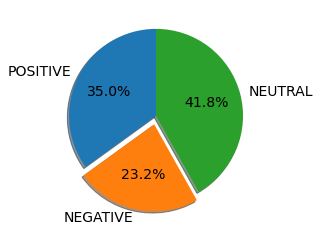

In [48]:
# Visualizing the values of the 3 classes before nlp model
import matplotlib.pyplot as plt
existence= ['POSITIVE','NEGATIVE','NEUTRAL'] 
data = [1446,958,1730] 
import matplotlib.pyplot as plt
 

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(data, explode=explode, labels=existence,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
 
plt.show()